# Pile \[*Stack*\]

Une pile est «conteneur» assujetti à la displine **Dernier entré, Premier sorti** (*Last In, First Out* abrégé en **LIFO**).

On peut se la représenter comme une «pile d'assiette»: 
- **Empiler** \[*push*\] consiste à poser une assiette sur le haut de la pile,
- **Dépiler** \[*pop*\] consiste à enlever l'assiette du haut de la pile (et à récupérer son contenu).

Son interface doit prévoir au minimum (en plus d'un constructeur):
- `empiler(valeur)`: insère une valeur au sommet de la pile,
- `depiler()`: renvoie et supprime la valeur située au sommet de la pile.

On ajoute souvent un attribut `sommet` accessible en lecture seule qui permet de récupérer la valeur au sommet de la pile et aussi un moyen de savoir le nombre d'éléments situés dans la pile.

## Implémentations

### avec une `list`

On peut tout simplement utiliser une `list` en se limitant à ses méthodes:
- `append(valeur)` pour empiler,
- `pop()` pour dépiler,
- `liste[-1]` pour accéder au sommet,
- `len(liste)` pour connaître son nombre d'éléments.

C'est très efficace car les opérations en fin de liste se font (presque toujours) en temps constant $O(1)$.

Si on souhaite renforcer la «**sémantique**» des opérations, on peut créer une classe ayant un attribut privé `__list`.

Achever l'implémentation qui suit de façon à passer le test ci-après.

In [ ]:
class Pile:
    def __init__(self):
        self.__liste = []
    def empiler(self, valeur):
        pass
    def depiler(self):
        if ___:
            raise IndexError("pile vide!")
        pass
    @property
    def sommet(self):
        ___
    def est_vide(self):
        pass
    def __len__(self):
        pass
    def __str__(self):
        if self.est_vide():
            return "Pile vide!"
        ch = ""
        for v in reversed(self.__liste):
            ch += f"{v}\n"
        return ch[:-1]

Test

In [ ]:
pile = Pile()
assert pile.est_vide() and str(pile) == "Pile vide!"
try:
    pile.depiler()
    raise AssertionError()
except:
    pass
pile.empiler(1); pile.empiler(2); pile.empiler(3)
assert str(pile) == "3\n2\n1" and len(pile)
assert pile.sommet == 3
v = pile.depiler()
assert v == 3 and pile.sommet == 2
pile.depiler(); v = pile.depiler()
assert len(pile) == 0 and pile.est_vide() and v == 1
print("Impeccable")

**Solution**

In [ ]:
class Pile:
    def __init__(self):
        self.__liste = []
    def empiler(self, valeur):
        self.__liste.append(valeur)
    def depiler(self):
        if len(self.__liste) == 0:
            raise IndexError("pile vide!")
        return self.__liste.pop()
    @property
    def sommet(self):
        return self.__liste[-1]
    def est_vide(self):
        return len(self) == 0
    def __len__(self):
        return len(self.__liste)
    def __str__(self):
        if self.est_vide():
            return "Pile vide!"
        ch = ""
        for v in reversed(self.__liste):
            ch += f"{v}\n"
        return ch[:-1]

### avec un «vrai» tableau

On ferait probablement cela avec un langage qui ne possède pas nativement de tableaux «dynamiques» comme Python  (il y en a beaucoup), mais des *tableaux de taille fixe*.

Pour comprendre cette manière de faire, nous la simulons avec un tableau de la forme `[None] * taille`.

On utilise alors un «pointeur» sur le **sommet** de pile \[*top of stack*\] qu'on initialise à $-1$ pour signifier que la pile est vide.

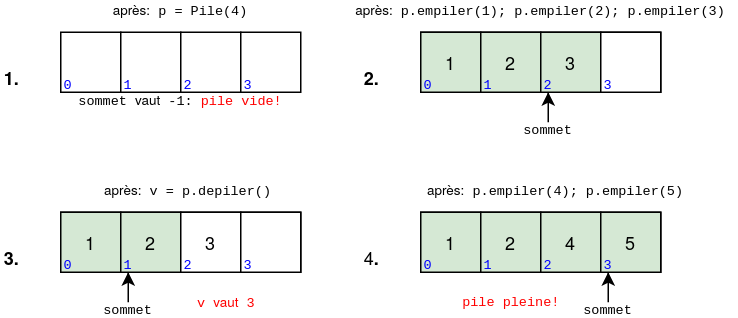

À vous de jouer!

In [ ]:
class Pile:
    def __init__(self, taille=2**10):
        self.__tableau = [None] * taille
        self.__sommet = -1
        self.__IMAX = taille - 1
    def empiler(self, valeur):
        if ___:
            raise IndexError("Pile pleine!")
        self.__sommet ___
        self.__tableau[___] = valeur
    def depiler(self):
        if ___:
            raise IndexError("Pile vide!")
        ___
        return ___
    @property
    def sommet(self):
        ___
    def est_vide(self): # redondant avec __len__
        return ___
    def __len__(self):
        return ___
    def __str__(self):
        if self.est_vide():
            return "Pile vide!"
        ch = ""
        i = self.__sommet
        while i >= 0:
            ch += f"{self.__tableau[i]}\n"
            i -= 1
        return ch[:-1]

In [ ]:
pile = Pile(4)
assert pile.est_vide() and str(pile) == "Pile vide!"
try:
    pile.depiler()
    raise AssertionError()
except:
    pass
pile.empiler(1); pile.empiler(2); pile.empiler(3)
assert str(pile) == "3\n2\n1" and len(pile)
assert pile.sommet == 3
v = pile.depiler()
assert v == 3 and pile.sommet == 2
pile.depiler(); v = pile.depiler()
assert len(pile) == 0 and pile.est_vide() and v == 1
pile.empiler(1); pile.empiler(2); pile.empiler(3); pile.empiler(4)
try:
    pile.empiler(5)
    raise AssertionError()
except:
    pass
print("Impeccable")

**Solution**

In [ ]:
class Pile:
    def __init__(self, taille=2**10):
        self.__tableau = [None] * taille
        self.__sommet = -1
        self.__IMAX = taille - 1
    def empiler(self, valeur):
        if self.__sommet == self.__IMAX:
            raise IndexError("Pile pleine!")
        self.__sommet += 1
        self.__tableau[self.__sommet] = valeur
    def depiler(self):
        if self.__sommet == -1:
            raise IndexError("Pile vide!")
        self.__sommet -= 1
        return self.__tableau[self.__sommet+1]
    @property
    def sommet(self):
        return self.__tableau[self.__sommet]
    def est_vide(self): # redondant avec __len__
        return self.__sommet == -1
    def __len__(self):
        return self.__sommet + 1
    def __str__(self):
        if self.est_vide():
            return "Pile vide!"
        ch = ""
        i = self.__sommet
        while i >= 0:
            ch += f"{self.__tableau[i]}\n"
            i -= 1
        return ch[:-1]

### avec une liste chaînée

On suppose disposer d'un type `Liste` muni de l'interface minimale suivante (outre un constructeur):
- **propriétés** (en lecture seul):
    - `tete`: permet d'obtenir la cellule en tête de liste,
    - `queue`: permet d'obtenir la cellule en queue de liste.
- **méthodes**:
    - `inserer_apres(valeur, cellule)`: insère valeur dans une cellule qui suit celle qui est donnée; si le deuxième argument n'est pas précisé, la valeur est insérée en tête de liste,
    - `supprimer_apres(cellule)`: supprime la valeur située dans la cellule qui suit celle qui est donnée; si aucun argument n'est fourni, supprime la cellule de tête. Elle renvoie la valeur de la cellule supprimée,
    - `__len__()`,
    - `__str__()`.

Une cellule est un objet ayant l'attribut publique `valeur` et la propriété accessible en lecture seule `suivante`.

Implémenter `Pile` en utilisant cette interface.

In [ ]:
from liste import Liste

class Pile:
    def __init__(self):
        self.__liste = ___
    def est_vide(self):
        pass
    def empiler(self, valeur):
        pass
    def depiler(self):
        if ___:
            raise IndexError("Pile vide!")
        pass
    @property
    def sommet(self):
        pass
    def __len__(self):
        pass
    def __str__(self):
        return str(self.__liste)

In [ ]:
pile = Pile()
assert pile.est_vide() and str(pile) == "None"
try:
    pile.depiler()
    raise AssertionError()
except:
    pass
pile.empiler(1); pile.empiler(2); pile.empiler(3)
assert str(pile) == "3 → 2 → 1" and len(pile)
assert pile.sommet == 3
v = pile.depiler()
assert v == 3 and pile.sommet == 2
pile.depiler(); v = pile.depiler()
assert len(pile) == 0 and pile.est_vide() and v == 1
print("Impeccable")

**Solution**

In [ ]:
from liste import Liste

class Pile:
    def __init__(self):
        self.__liste = Liste()
    def est_vide(self):
        return len(self.__liste) == 0
    def empiler(self, valeur):
        self.__liste.inserer_apres(valeur)
    def depiler(self):
        if self.est_vide():
            raise IndexError("Pile vide!")
        return self.__liste.supprimer_apres()
    @property
    def sommet(self):
        return self.__liste.tete.valeur
    def __len__(self):
        return len(self.__liste)
    def __str__(self):
        return str(self.__liste)

## Applications - Exercices

### 1 - Parenthèses équilibrées

Les parenthèses d'une chaîne sont *bien équilibrées* si:
- la chaîne ne contient aucune parenthèse ou,
- si elle est de la forme `"<prefixe>(<milieu>)<suffixe>"` où `<prefixe>`, `<milieu>` et `<suffixe>` sont des chaînes dont les parenthèses sont *bien équilibrées*.

On pourrait dès lors «facilement» écrire une fonction récursive `par_ok(chaine)` qui renvoie `True` ou `False` selon que la chaîne fournie est bien équilibrée au niveau des parenthèses.

Mais *on peut aussi utiliser une pile*: l'idée est de lire les caractères de gauche à droite et de faire un *push* lorsqu'on rencontre une parenthèse ouvrante et un *pop* pour une parenthèse fermante.

À quelle condition peut-on affirmer que les parenthèses de la chaîne lue sont équilibrées?

Implémenter cette fonction.

In [ ]:
# À VOUS DE JOUER (COMMENCER PAR QUELQUES ASSERTIONS)

**Solution**

In [ ]:
def par_ok(chaine):
    pile = Pile()
    for c in chaine:
        if c == "(":
            pile.empiler(c)
        elif c == ")":
            pile.depiler()
    return len(pile) == 0

assert par_ok("()()") == True
assert par_ok("(()") == False
assert par_ok("") == True
assert par_ok("((hue)((oh)(ah)))") == True

### 2 - Notation polonaise inverse

Les calculatrices scientifique HP (qui était très courantes il y a encore peu) proposaient d'écrire les calculs sans aucune parenthèses. Par exemple:
- $5\times(2+6)$ s'écrivait `2 6 + 5 *`. Le calcul se déroulait comme suit:
    - `2 6 + 5 *` devient `8 5 *` devient `40`.


- $(1-2\times 3)\times 4$ s'écrivait `1 2 3 * - 4 *` et donnait:
    - `1 2 3 * - 4 *` devient `1 6 - 4 *` devient `-5 4 *` devient `-20`.

Implémenter la fonction `eval_polinv(expression)` qui renvoie la valeur de l'expression fournie (sous la forme d'une chaîne de caractère).

In [ ]:
# À VOUS DE JOUER (COMMENCER PAR QUELQUES ASSERTIONS)

**Solution**

In [5]:
def eval_polinv(expression: str):
    pile = Pile()
    lecture_nb = False
    nb_str = ""
    for c in expression:
        if c == " ":
            if lecture_nb:
                lecture_nb = False
                pile.empiler(float(nb_str))
                nb_str = ""
            continue
        if c in "+-*/":
            v1 = float(pile.depiler())
            v2 = float(pile.depiler())
            if c == "+":
                pile.empiler(v1 + v2)
            elif c == "-":
                pile.empiler(v2 - v1) # attention à l'oredre
            elif c == "*":
                pile.empiler(v1 * v2)
            elif c == "/":
                pile.empiler(v2 / v1)
        else:
            if not lecture_nb:
                lecture_nb = True
            nb_str += c
    if len(pile) != 1:
        raise SyntaxError("l'expression fournie n'est pas correctement formé")
    return pile.depiler()
            
assert eval_polinv("2 6 + 5 *") == 40
assert eval_polinv("1 2 3 * - 4 *") == -20

à faire ...